<a href="https://colab.research.google.com/github/kaz-kobayashi/2019TUSjikkenC/blob/master/190726-NonlinearOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ここの内容は，並木誠，Pythonによる数理最適化入門，朝倉書店,2018によっている．第5章から適宜引用している．

# 扱いやすい非線形凸最適化問題

一般の制約付き非線形最適化問題を実際に解くには関数が凸でもかなり難しい．そこでここでは，アルゴリズムも整備されていて，広く応用されてる2種類の非線形凸最適化問題を取りあげる．

## 凸2次最適化問題

制約がすべて線形で，目的関数が凸の2次関数である最適化問題を，**凸2次最適化問題**といい次のように定式化される．

(QP)

$ 最小化 \  \  \boldsymbol{c}^T \boldsymbol{x}  + \frac{1}{2} \boldsymbol{x}^T \boldsymbol{Q} \boldsymbol{x} $

$ 条件  \ \ \boldsymbol{A} \boldsymbol{x} \geq \boldsymbol{b}, \boldsymbol{x} \geq \boldsymbol{0} $

ここで，$\boldsymbol{c} \in \mathrm{R}^n, \boldsymbol{Q}  \in \mathrm{R}^{n \times n}$は半正定値行列，$\boldsymbol{A} \in \mathrm{R}^{m \times n}, \boldsymbol{b} \in \mathrm{R}^m$
とする．

最適ポートフォリオ選択問題，サポートベクトルマシンなどを応用にもつ．

次に具体例を挙げる．

$ \boldsymbol{c} = \begin{bmatrix}
-2 \\
-4
\end{bmatrix},
\boldsymbol{Q} = \begin{bmatrix}
2 & -1 \\
-1 & 3 
\end{bmatrix}
$
$ 
\boldsymbol{A} = \begin{bmatrix}
-2 & -3 \\
-1 & -4 
\end{bmatrix},
\boldsymbol{c} = \begin{bmatrix}
-6 \\
-5
\end{bmatrix}
$

Pythonで凸2次最適化問題を解くには，cvxoptというパッケージを用いる．このパッケージは，凸2次最適化問題を含む，広い凸最適化問題を扱いうことができる．

上にあげた問題例を解くコードは次のとおりである．



In [0]:
import numpy as np
from cvxopt import solvers, matrix
Q=matrix(np.array([[2.0,-1.0],[-1.0,3.0]]))
c=matrix(np.array([-2.0,-4.0]))
A=matrix(np.array([[-1.0,0.0],[0.0,-1.0],[2.0,3.0],[1.0,4.0]]))
b=matrix(np.array([0.0,0.0,6.0,5.0]))

In [2]:
print(Q)
print(A)
print(c)
print(b)

[ 2.00e+00 -1.00e+00]
[-1.00e+00  3.00e+00]

[-1.00e+00  0.00e+00]
[ 0.00e+00 -1.00e+00]
[ 2.00e+00  3.00e+00]
[ 1.00e+00  4.00e+00]

[-2.00e+00]
[-4.00e+00]

[ 0.00e+00]
[ 0.00e+00]
[ 6.00e+00]
[ 5.00e+00]



In [3]:
sol=solvers.qp(P=Q,q=c,G=A,h=b)
print(sol)
print(sol["x"])
print(sol["primal objective"])

     pcost       dcost       gap    pres   dres
 0: -4.8105e+00 -6.4700e+00  1e+01  4e-01  3e+00
 1: -4.1678e+00 -5.6606e+00  1e+00  6e-17  3e-16
 2: -4.5418e+00 -4.6061e+00  6e-02  1e-17  1e-16
 3: -4.5465e+00 -4.5472e+00  7e-04  1e-16  2e-16
 4: -4.5465e+00 -4.5465e+00  7e-06  1e-16  1e-16
 5: -4.5465e+00 -4.5465e+00  7e-08  1e-17  2e-16
Optimal solution found.
{'x': <2x1 matrix, tc='d'>, 'y': <0x1 matrix, tc='d'>, 's': <4x1 matrix, tc='d'>, 'z': <4x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 7.284650158656621e-08, 'relative gap': 1.6022504205937193e-08, 'primal objective': -4.546511622045491, 'dual objective': -4.546511694891993, 'primal infeasibility': 1.4214949210266778e-17, 'dual infeasibility': 2.0014830212433602e-16, 'primal slack': 1.0081752643395509e-08, 'dual slack': 4.21430289047439e-09, 'iterations': 5}
[ 1.19e+00]
[ 9.53e-01]

-4.546511622045491


基本的には問題を決定する行列とベクトルをcvxoptが提供するmatrix形式でソルバーに渡せば解いてくれる．ただし行列，ベクトルをmatrix形式で作成するときはnumpyの配列を経由するなどの注意が必要である．

上の例では，5回の繰り返しの後，最適解$(\frac{51}{43},\frac{41}{43})$と最適値$-4.546...$を得た．


#錐最適化問題

錐とは次で定義される．

##錐，凸錐，閉凸錐
集合$C \subseteq \mathrm{R}^n$に対し，任意の$\boldsymbol{x}\in C$と$\alpha>0$に対し， $\alpha \boldsymbol{x} \in C$であるとき，$C$を錐(cone)という．凸集合である錐を凸錐（convex cone），さらに閉集合の凸錐を閉凸錐（closed convex cone）という．

##錐最適化問題の定式化

$\boldsymbol{c} \in \mathrm{R}^n,\boldsymbol{A} \in \mathrm{R}^{m \times n},\boldsymbol{b} \in \mathrm{R}^m,\boldsymbol{C} \subseteq \mathrm{R}^n$
を閉凸錐とする．以下の最適化問題を錐線形最適化問題と呼ぶ．

最小化 $\boldsymbol{c}^{\top} \boldsymbol{x} $

条件   $\boldsymbol{Ax} = \boldsymbol{b}$

$\quad \quad \boldsymbol{x} \in C$

錐線形最適化問題は，双対問題を簡潔である条件のもとでは双対定理も成り立つ応用範囲の広い凸最適化問題である．

##2次錐最適化問題

凸錐$\boldsymbol{C}$が2次錐あるいは2次錐の直和で表されるとき，その問題は**2次錐最適化問題**という．ここで2次錐とは，$C=\{\boldsymbol{x} \in \mathrm{R}^n | x_1 \geq \sqrt{x_2^2+x_3^2+\cdots+x_n^2}\}$のことであり，アイスクリームコーンの形をしている．

以下のようなゴミ集積所決定問題が２次錐最適化問題として定式化可能である．

###ゴミ集積所決定問題###

ある地区には8軒の家が散らばって建っている．それぞれの家の位置の$x$座標，$y$座標は与えられている．ここにゴミ集積所を作りたい．ただし各家庭のゴミの量は表のように決まっており，ゴミの量と家から集積所への距離をかけて，各家庭で足し合わせたもの，つまりゴミ出しのときの総仕事量を最小にしたい．どこに集積所を作ったらよいか？

家の集合を$H=\{0,1,2,3,4,5,6,7\}$，
ゴミ集積所の位置を$(X,Y)$，
家$i$の位置の$x$座標を$x_i(i \in H)$，家$i$の位置の$y$座標を$y_i (i \in H)$，　家のゴミの量を$w(i) (i \in H)$とする．さらにごみ集積所と家$i$間の距離を$d_i (i \in H)$とすると，上のゴミ集積所決定問題は以下のように定式化される．

最小化        $\quad d_0+2d_1+2d_2+d_3+2d_4+5d_5+4d_6+d_6$

条件　　$\quad d_i \geq \sqrt{(X-x_i)^2+(Y-y_i)^2}\quad \forall i \in H$

これは2次錐最適化問題である．

Pythonで解くために，picosと呼ばれるインターフェースを提供するパッケージを利用する．ソルバーはcvxoptである．


In [4]:
!pip install picos

     |████████████████████████████████| 163kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/a2/13/52/4f2a1449b56f4a9e2d50b5089013cd8232351a2de012d0b2e5
Successfully built picos


In [0]:
import numpy as np 
import picos as pic
import matplotlib.pyplot as plt

H=[0,1,2,3,4,5,6,7]
p=[[44,47],[64,67],[67,9],[83,21],[36,87],[70,88],[88,12],[58,65]]
w=[1,2,2,1,2,5,4,1]

In [7]:
socp=pic.Problem()
X=socp.add_variable('X',2)
d=[socp.add_variable('d['+str(i)+']',1) for i in H]
objective=sum(w[i]*d[i] for i in H)
socp.set_objective('min',objective)
socp.add_list_of_constraints([abs(p[i]-X)<d[i] for i in H])
res=socp.solve(solver='cvxopt')
print(X.value[0])
print(X.value[1])

        PICOS 1.2.0.post32         
Building a CVXOPT problem instance.
Solving the problem via CVXOPT.
-----------------------------------
 Python Convex Optimization Solver 
    via internal CONELP solver     
-----------------------------------
     pcost       dcost       gap    pres   dres   k/t
 0: -3.7303e-14 -2.1370e-14  9e+02  5e-01  7e-17  1e+00
 1:  5.5052e+02  5.5465e+02  2e+02  1e-01  1e-15  4e+00
 2:  6.0315e+02  6.0404e+02  4e+01  2e-02  8e-16  9e-01
 3:  6.1384e+02  6.1426e+02  1e+01  9e-03  4e-16  4e-01
 4:  6.1807e+02  6.1814e+02  1e+00  7e-04  6e-16  7e-02
 5:  6.1856e+02  6.1856e+02  6e-02  4e-05  2e-15  4e-03
 6:  6.1859e+02  6.1859e+02  2e-03  1e-06  2e-14  1e-04
 7:  6.1859e+02  6.1859e+02  9e-05  6e-08  3e-13  6e-06
 8:  6.1859e+02  6.1859e+02  2e-06  2e-09  4e-12  1e-07
Optimal solution found.
------------[ CVXOPT ]-------------
Solution is optimal after 4.0e-02s.
=============[ PICOS ]=============
64.00000030746362
66.99999955529726


次のコードで，
ゴミ集積所と家の位置を表示した図が得られる。

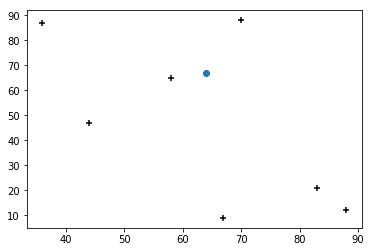

In [8]:
x=np.array(p)[:,0]
y=np.array(p)[:,1]
plt.scatter(x,y,color='k',marker='+')
plt.scatter(X.value[0],X.value[1],marker='o')
plt.show()


# Scipy Lecture Notes 

https://scipy-lectures.org/

##1次元関数の最適化



In [9]:
from scipy import optimize
def f(x):
    return -np.exp(-(x-.7)**2)
x_min=optimize.brent(f)
print(x_min)
print(x_min-.7)

0.6999999997839409
-2.160590595323697e-10


scipy.optimize.fminbound(f,lb,ub)により，区間の制約をつけた最適化ができる．

In [10]:
from scipy import optimize
def f(x):
    return -np.exp(-(x-.7)**2)
x_min=optimize.fminbound(f,0,0.5)
print(x_min)
print(x_min-.7)

0.49999553788108364
-0.20000446211891632


##共役勾配法

共役勾配法は，scipy.optimize.fmin_cg()で実現できる．



In [0]:
def f(x):
    return .5*(1-x[0])**2+(x[1]-x[0]**2)**2


In [12]:
optimize.fmin_cg(f,[2,2])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 80
         Gradient evaluations: 20


array([0.99999639, 0.99999253])

この方法は関数の勾配を渡した方が性能が良い．

In [0]:
def fprime(x):
    return np.array((-2*.5*(1-x[0])-4*x[0]*(x[1]-x[0]**2),2*(x[1]-x[0]**2)))

In [14]:
optimize.fmin_cg(f,[2,2],fprime=fprime)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 20
         Gradient evaluations: 20


array([0.99999649, 0.99999274])

##ニュートン法と準ニュートン法

ニュートン法は，移動方向に局所的な二次近似を利用します．そのため1階微分である勾配と，2階微分であるヘッセ行列を用います．

scipyではscipy.optimize.fmin_ncg()を用いてニュートン法を実行することができます．

In [0]:
def f(x):
    return .5*(1-x[0])**2+(x[1]-x[0]**2)**2
def fprime(x):
    return np.array((-2*.5*(1-x[0])-4*x[0]*(x[1]-x[0]**2),2*(x[1]-x[0]**2)))

In [16]:
optimize.fmin_ncg(f,[2,2],fprime=fprime)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 51
         Hessian evaluations: 0


array([1., 1.])

共役勾配法と比べて，ニュートン法は関数の評価回数は少く済みますが，勾配の評価回数は（ヘッセ行列の評価に使うために）増えます．これはヘッセ行列を渡すことによって改善します．

In [0]:
def hessian(x):
    return np.array(((1-4*x[1]+12*x[0]**2,-4*x[0]),(-4*x[0],2)))

In [18]:
optimize.fmin_ncg(f,[2,2],fprime=fprime,fhess=hessian)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 19
         Hessian evaluations: 9


array([1., 1.])

## 曲線のフィッティング

データが非線形な場合の最小二乗問題は，scipy.optimize.curve_fit()で扱うことができます．

(https://www.haya-programming.com/entry/2019/03/12/052716より適宜引用)

$f=x+a$でフィットする．

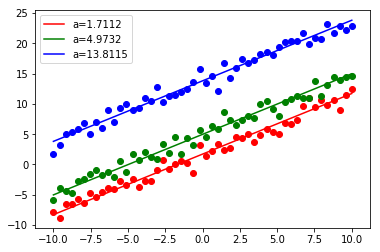

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a):
    return x + a

def main():
    n = 50
    x = np.linspace(-10, 10, n)
    plt.figure()
    for i, a in enumerate([2, 5, 14]):
        y = func(x, a) + np.random.randn(n)
        params, cov = curve_fit(func, x, y)
        plt.scatter(x, y, c="rgb"[i])
        plt.plot(x, func(x, *params), c="rgb"[i],
                 label="a={:.4f}".format(*params))
    plt.legend()
    plt.savefig("result1.png")

if __name__ == "__main__":
    main()

$f(x)=ax$をフィットする

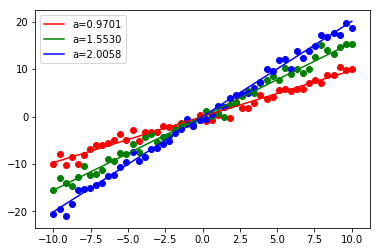

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a):
    return x * a

def main():
    n = 50
    x = np.linspace(-10, 10, n)
    plt.figure()
    for i, a in enumerate([1, 1.5, 2]):
        y = func(x, a) + np.random.randn(n)
        params, cov = curve_fit(func, x, y)
        plt.scatter(x, y, c="rgb"[i])
        plt.plot(x, func(x, *params), c="rgb"[i],
                 label="a={:.4f}".format(*params))
    plt.legend()
    plt.savefig("result2.png")

if __name__ == "__main__":
    main()

$f(x)=ax+b$をフィットする

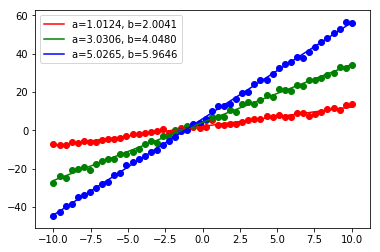

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b):
    return x * a + b

def main():
    n = 50
    x = np.linspace(-10, 10, n)
    plt.figure()
    for i, pt in enumerate([[1, 2], [3, 4], [5,6]]):
        y = func(x, *pt) + np.random.randn(n)
        params, cov = curve_fit(func, x, y)
        plt.scatter(x, y, c="rgb"[i])
        plt.plot(x, func(x, *params), c="rgb"[i],
                 label="a={:.4f}, b={:.4f}".format(*params))
    plt.legend()
    plt.savefig("result3.png")

if __name__ == "__main__":
    main()

4次多項式$ax^4+bx^3+cx^2+dx+e$

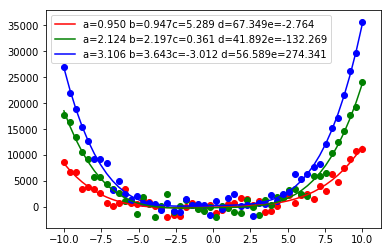

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c, d, e,):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

def main():
    n = 50
    x = np.linspace(-10, 10, n)
    plt.figure()
    for i, pt in enumerate([[1,2,3,4,5],
                            [2,3,4,5,6],
                            [3,4,5,6,7]]):
        # 値のスケールが大きいのでノイズの大きさを調整
        y = func(x, *pt) + 1000*np.random.randn(n)
        params, cov = curve_fit(func, x, y)
        plt.scatter(x, y, c="rgb"[i])
        plt.plot(x, func(x, *params), c="rgb"[i],
                 label=("a={:.3f} b={:.3f}"
                        "c={:.3f} d={:.3f}"
                        "e={:.3f}").format(*params))
    plt.legend()
    plt.savefig("result4.png")

if __name__ == "__main__":
    main()


#制約付き最適化問題

変数の範囲を指定する制約（箱型の制約）は下のコードで実行できます．

In [0]:
def f(x):
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)
optimize.fmin_l_bfgs_b(f, np.array([0, 0]), approx_grad=1, bounds=((-1.5, 1.5), (-1.5, 1.5)))   


(array([1.5, 1.5]),
 1.5811388300841898,
 {'funcalls': 9,
  'grad': array([-0.94868331, -0.31622778]),
  'nit': 2,
  'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'warnflag': 0})

一般の不等式で課される制約はscipy.fmin_slspq()で解くことができます．

In [0]:
def f(x):
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

def constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

optimize.fmin_slsqp(f, np.array([0, 0]), ieqcons=[constraint, ])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.4748737350439685
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5


array([1.25004696, 0.24995304])

#疎行列



http://www.turbare.net/transl/scipy-lecture-notes/advanced/scipy_sparse/introduction.html#why-sparse-matrices

からの引用

Text(0, 0.5, 'memory [MB]')

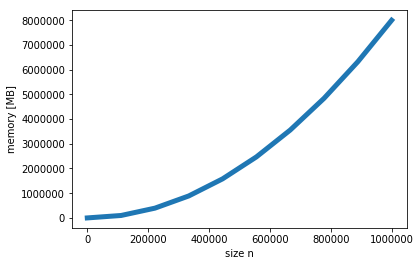

In [0]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1e6, 10)
plt.plot(x, 8.0 * (x**2) / 1e6, lw=5)    
plt.xlabel('size n')    
plt.ylabel('memory [MB]')    
